## Module 4 Homework

An article in the *ACI Materials Journal* (Vol/ 85, 1987, pp. 213-216) describes several experiments investigating the rodding of concrete to remove entrapped air.  A 3-inch X 6-inch cylinder was used, and the number of times this rod was used is the design variable.  The resulting compressive strength of the concrete specimen is the response.  The data are available in the file **rodding_concrete.csv**.

1. Write out the the formal statistical model for these data and interpret each term in the context of the problem.

$$ y_{ij} = \mu + \tau_i + \epsilon_ij $$

> The compression strength of $j$th replication of treatment $i$ is denoted $y_{ij}$
> The average compression strength over all replication and treatment is denoted $\mu$
> The average treatment effect on compression strength for treatment $i$ is denoted $\tau_{i}$
> The part of the compression strength not explained by the treatments is denoted $\epsilon_{ij}$

2. Below, I have included  the code that reads the data into a data frame called `rodding`.  Start by using `R` to create side-by-side boxplots and commenting on what you learn.

In [6]:
rodding = read.csv("https://github.com/yardsale8/STAT321/raw/master/rodding_concrete.csv")
rodding

Rodding.Level,Compressive.Strength
<int>,<int>
10,1530
10,1530
10,1440
15,1610
15,1650
15,1500
20,1560
20,1730
20,1530


In [0]:
# Extract the necessary information from the data to make our life easier
y <- rodding$Compressive.Strength
trt <- rodding$Rodding.Level
t <- length(unique(trt))
n <- nrow(rodding)

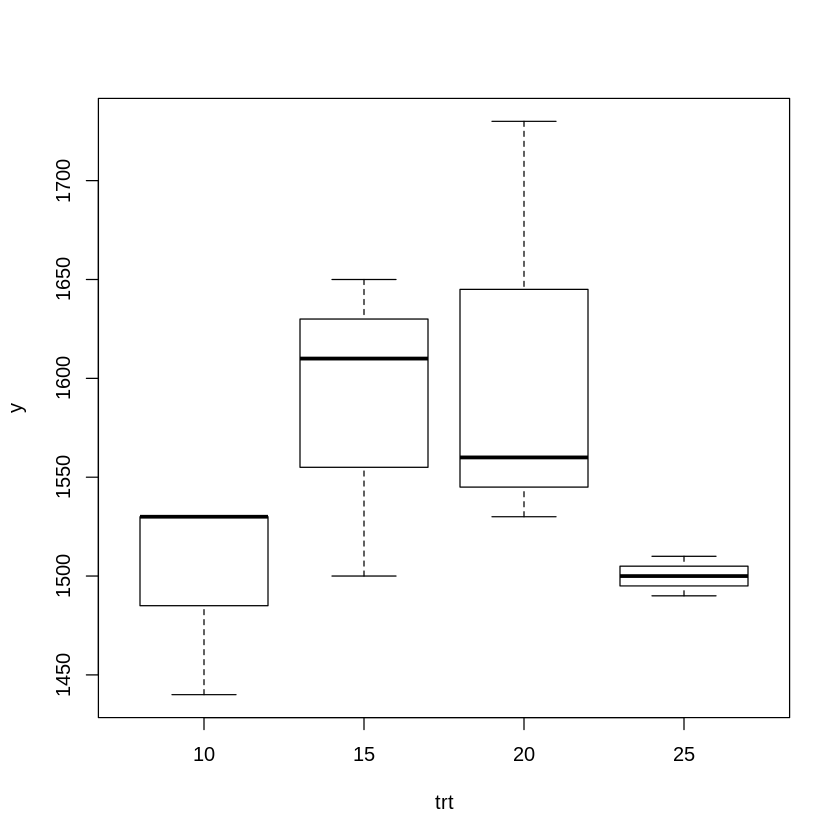

In [29]:
# Side-by-side boxplots
boxplot(y~trt)

<font color="blue"><i>**Interpretation:** We note that the levels of 15 and 20 had the largest strength, and are probably significantly larger than the other two treatments.</i></font>

3. Use `R` to create the design matrix for this experiment.  Be sure to reparameterize as shown in the notes (page 8).

<font color="blue"> <i>Note that there are 3 replications of each of the 4 treatments.  Also, we need to drop the last column and replace the last 3 rows with -1 (see the notes).</i></font>


In [30]:
num_rep <- 3
X = cbind(rep(1, each=n),
          rep(c(1,0,0,-1), each=num_rep),
          rep(c(0,1,0,-1), each=num_rep),
          rep(c(0,0,1,-1), each=num_rep))
X

1,1,0,0
1,1,0,0
1,1,0,0
1,0,1,0
1,0,1,0
1,0,1,0
1,0,0,1
1,0,0,1
1,0,0,1
1,-1,-1,-1
1,-1,-1,-1


4. Use matrix arithmetic to compute each of the following: $\mathbf{r}$, $SSE$, $MSE$ and the $SE$ for each term in the model.

In [31]:
length(y)

[1] 12

In [32]:
mu_hat = solve(t(X) %*% X) %*% t(X) %*% y # Estimated model parameters
mu_hat

1548.33333
-48.33333
38.33333
58.33333


In [33]:
y_hat = X %*% mu_hat # Estimates for y_ij base on the model
y_hat

1500.000
1500.000
1500.000
1586.667
1586.667
1586.667
1606.667
1606.667
1606.667
1500.000
1500.000


In [34]:
r = y - y_hat # Within group error are the difference between predicted and actual
r

3.000000e+01
3.000000e+01
-6.000000e+01
2.333333e+01
6.333333e+01
-8.666667e+01
-4.666667e+01
1.233333e+02
-7.666667e+01
-4.547474e-13
-1.000000e+01


In [35]:
df_error <- n - t
df_error

[1] 8

In [36]:
SS_error <- (t(r) %*% r)[1] # The dot product is a fancy way to square-and-sum
SS_error

[1] 40933.33

In [37]:
sigma_sqr_hat <- SS_error/df_error # AKA MS error from the ANOVA table
sigma_sqr_hat

[1] 5116.667

5. Use JMP to verify all of your calculations.  Take a screenshot of the relevant output be sure to paste your JMP screenshot into your Word file and answer the following question.

<font color="blue"> <i> Here is the JMP output for this experment. </i></font>

<img src="https://github.com/yardsale8/STAT321/raw/master/img/rodding_output.png" width="400"/>

> <font color="blue"> <i> Yes, we have the same group means, $SS_{error}$ and $MS_{error}$.</i></font>